In [1]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans #The k-means algorithm
import matplotlib.pyplot as plt

Each row is a user (Row 1 = User #1)
Each column is a joke (Column 1 = Joke #1)
Ratings are given as real values from -10.00 to +10.00
99 corresponds to a null rating
As of May 2009, the jokes 7, 8, 13, 15, 16, 17, 18, 19 are the "gauge set

In [2]:
ratings = pd.read_csv ("Assignment 4 - data jokes.csv", header = None)
ratings.head()

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,99,99,99,99,0.21875,99,-9.28125,-9.28125,99,99,...,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0
1,99,99,99,99,-9.68750,99,9.93750,9.53125,99,99,...,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0
2,99,99,99,99,-9.84375,99,-9.84375,-7.21875,99,99,...,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0
3,99,99,99,99,6.90625,99,4.75000,-5.90625,99,99,...,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0
4,99,99,99,99,-0.03125,99,-9.09375,-0.40625,99,99,...,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0


In [3]:
#loading the jokes text and parsing to pandas
colname =["joke"]
jokes = pd.read_csv("Assignment 4 - text jokes.csv", delimiter = "\t", names=colname, header=None)
jokes.head()

,joke
1:,"A man visits the doctor. The doctor says, ""I h..."
2:,This couple had an excellent relationship goin...
3:,Q. What's 200 feet long and has 4 teeth? A. Th...
4:,Q. What's the difference between a man and a t...
5:,Q. What's O. J. Simpson's web address? A. Slas...


In [20]:
jokes.info()
#looks like there are only 149 jokes

<class 'pandas.core.frame.DataFrame'>
Index: 151 entries, 1: to nan
Data columns (total 1 columns):
joke    150 non-null object
dtypes: object(1)
memory usage: 2.4+ KB


In [5]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50692 entries, 0 to 50691
Columns: 150 entries, 0 to 149
dtypes: float64(140), int64(10)
memory usage: 58.0 MB


In [6]:
#replace 99 and 99.0 with null values in ratings dataframe
ratings = ratings.replace(99, 0)  #replacing with 0 is not the best system since 0 itself is a valid ratings value
ratings.head()

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,0,0,0,0,0.21875,0,-9.28125,-9.28125,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,-9.68750,0,9.93750,9.53125,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,0,-9.84375,0,-9.84375,-7.21875,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,6.90625,0,4.75000,-5.90625,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,-0.03125,0,-9.09375,-0.40625,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


According to https://www.ieor.berkeley.edu/~goldberg/jester-data/ The first column gives the number of jokes rated by that user. The next 150 columns give the ratings for jokes 01 - 150.


In [7]:
#create a subset of the ratings matrix containing the gauge set items (jokes 7, 8, 13, 15, 16, 17, 18, 19 )
guage = ratings[[7,8,13,15,16, 17,18,19]]
guage = guage.dropna()
guage.head()

,7,8,13,15,16,17,18,19
0,-9.28125,0,0,-9.65625,-9.03125,-7.46875,-8.71875,-9.15625
1,9.53125,0,0,3.71875,9.65625,-2.68750,-9.56250,-9.12500
2,-7.21875,0,0,-9.96875,-9.87500,-9.81250,-9.78125,-6.84375
3,-5.90625,0,0,3.87500,6.21875,5.65625,6.09375,5.40625
4,-0.40625,0,0,-9.43750,0.12500,-9.15625,3.65625,-9.43750


In [8]:
#Using a dataframe with only the columns that contain no missing values, perform a k-means clustering on users 
#Investigate the clusters and try to give an interpretation with the joke texts: what type of user are they? 

km = KMeans(n_clusters=3) #create a new k-means model with 3 clusters
X = guage #get the X variables from the dataframe
km = km.fit(X) #calculate the cluster centers
guage['cluster_1'] = km.predict(X) #predict the clusters of each observation and store in the dataframe
guage.head()

,7,8,13,15,16,17,18,19,cluster_1
0,-9.28125,0,0,-9.65625,-9.03125,-7.46875,-8.71875,-9.15625,0
1,9.53125,0,0,3.71875,9.65625,-2.68750,-9.56250,-9.12500,1
2,-7.21875,0,0,-9.96875,-9.87500,-9.81250,-9.78125,-6.84375,0
3,-5.90625,0,0,3.87500,6.21875,5.65625,6.09375,5.40625,1
4,-0.40625,0,0,-9.43750,0.12500,-9.15625,3.65625,-9.43750,2


In [9]:
# comparing jokes 7 and 16 in the clusters
print (jokes.iloc[6])
print (jokes.iloc[15])

joke    How many feminists does it take to screw in a ...
Name: 7:, dtype: object
joke    Q. What is orange and sounds like a parrot? A....
Name: 16:, dtype: object


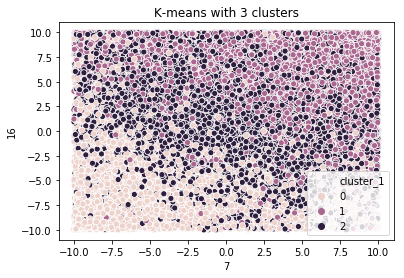

In [10]:
#plot with 3 clusters
sns. scatterplot(x = 7, y =16, hue= "cluster_1", data = guage)
plt.title('K-means with 3 clusters')
plt.show()

In [11]:
# with 5 clusters
km = KMeans(n_clusters=5) #create a new k-means model with 3 clusters
X = guage #get the X variables from the dataframe
km = km.fit(X) #calculate the cluster centers
guage['cluster_2'] = km.predict(X) #predict the clusters of each observation and store in the dataframe
guage.head()

,7,8,13,15,16,17,18,19,cluster_1,cluster_2
0,-9.28125,0,0,-9.65625,-9.03125,-7.46875,-8.71875,-9.15625,0,4
1,9.53125,0,0,3.71875,9.65625,-2.68750,-9.56250,-9.12500,1,3
2,-7.21875,0,0,-9.96875,-9.87500,-9.81250,-9.78125,-6.84375,0,4
3,-5.90625,0,0,3.87500,6.21875,5.65625,6.09375,5.40625,1,2
4,-0.40625,0,0,-9.43750,0.12500,-9.15625,3.65625,-9.43750,2,0


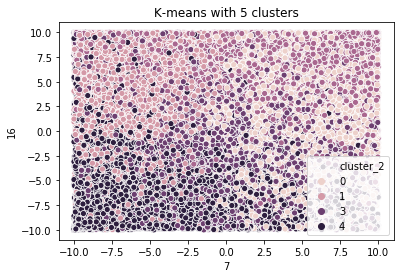

In [12]:
#plot with 5 clusters
sns. scatterplot(x = 7, y =16, hue= "cluster_2", data = guage)
plt.title('K-means with 5 clusters')
plt.show()

In [13]:
#with 7 clusters
km = KMeans(n_clusters=7) #create a new k-means model with 3 clusters
X = guage #get the X variables from the dataframe
km = km.fit(X) #calculate the cluster centers
guage['cluster_3'] = km.predict(X) #predict the clusters of each observation and store in the dataframe
guage.head()

,7,8,13,15,16,17,18,19,cluster_1,cluster_2,cluster_3
0,-9.28125,0,0,-9.65625,-9.03125,-7.46875,-8.71875,-9.15625,0,4,0
1,9.53125,0,0,3.71875,9.65625,-2.68750,-9.56250,-9.12500,1,3,3
2,-7.21875,0,0,-9.96875,-9.87500,-9.81250,-9.78125,-6.84375,0,4,0
3,-5.90625,0,0,3.87500,6.21875,5.65625,6.09375,5.40625,1,2,4
4,-0.40625,0,0,-9.43750,0.12500,-9.15625,3.65625,-9.43750,2,0,6


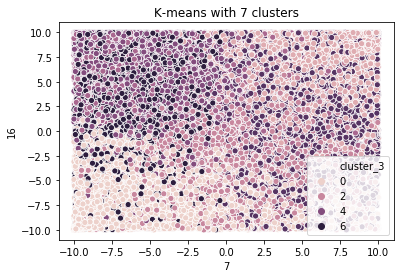

In [14]:
#plot with 7 clusters
sns. scatterplot(x = 7, y =16, hue= "cluster_3", data = guage)
plt.title('K-means with 7 clusters')
plt.show()

it seems that the more clusters there are the fuzzier the picture seems to be. With only 3 clusters it is 

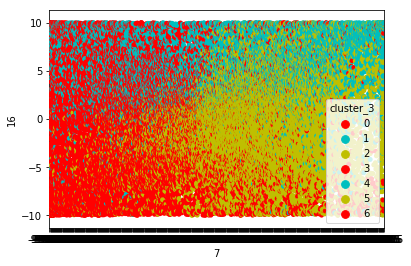

In [15]:
sns.swarmplot(x=7, y=16, hue="cluster_3",
              palette=["r", "c", "y"], data=guage)

In [16]:
# in you own words how does k-means clustering work?
#Using all the data (including the columns with missing values), 

In [18]:
ratings = ratings.T
ratings

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,0.0,0.0,0.0,0.0,0.21875,0.0,-9.28125,-9.28125,0.0,0.0,...,0.00000,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
1,0.0,0.0,0.0,0.0,-9.68750,0.0,9.93750,9.53125,0.0,0.0,...,0.00000,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2,0.0,0.0,0.0,0.0,-9.84375,0.0,-9.84375,-7.21875,0.0,0.0,...,0.00000,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
3,0.0,0.0,0.0,0.0,6.90625,0.0,4.75000,-5.90625,0.0,0.0,...,0.00000,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
4,0.0,0.0,0.0,0.0,-0.03125,0.0,-9.09375,-0.40625,0.0,0.0,...,0.00000,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
5,0.0,0.0,0.0,0.0,-2.90625,0.0,-2.34375,-0.50000,0.0,0.0,...,0.00000,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
6,0.0,0.0,0.0,0.0,6.21875,0.0,-7.43750,-0.81250,0.0,0.0,...,0.00000,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
7,0.0,0.0,0.0,0.0,8.25000,0.0,9.00000,8.87500,0.0,0.0,...,0.00000,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
8,0.0,0.0,0.0,0.0,-5.75000,0.0,0.28125,0.78125,0.0,0.0,...,0.00000,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
9,0.0,0.0,0.0,0.0,-7.15625,0.0,-5.90625,-0.09375,0.0,0.0,...,0.00000,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


In [25]:
#testing correlation with joke number
correlation = ratings.corrwith(ratings[6], axis=0, drop=False)
correlation

0           NaN
1           NaN
2           NaN
3           NaN
4      0.040638
5           NaN
6      1.000000
7      0.337937
8           NaN
9           NaN
10          NaN
11          NaN
12     0.289759
13          NaN
14     0.319336
15     0.224228
16     0.183418
17     0.226355
18     0.143543
19     0.023648
20     0.043238
21     0.045161
22     0.054295
23     0.072552
24     0.054961
25     0.053724
26     0.012085
27     0.035969
28     0.093790
29     0.038721
         ...   
120    0.055942
121    0.077003
122    0.044061
123    0.072526
124    0.056985
125    0.084107
126   -0.018364
127    0.029725
128    0.011644
129    0.028161
130    0.046410
131    0.043371
132    0.016296
133    0.024579
134    0.050187
135    0.026632
136    0.047553
137   -0.008690
138    0.029391
139    0.051389
140    0.047682
141    0.010766
142    0.000051
143    0.054579
144   -0.008110
145    0.032763
146    0.001191
147    0.023569
148    0.019140
149    0.066770
Length: 150, dtype: floa

In [30]:
#write a function that takes the joke number as input, and outputs the correlation with all the jokes.
def jokecorr(index):
    correlation = ratings.corrwith(ratings[index], axis=0, drop=False)
    c = correlation.sort_values(ascending = False)
    return c

index = int(input("Please enter the joke number: "))
jokecorr(index)

#Choose one joke and use your function to calculate the most similar jokes. Look at the jokes. 
#What similarities (if any) do you see? Try to give an interpretation. This may not always be easy/possible.

Please enter the joke number: 7


7      1.000000
12     0.353636
6      0.337937
14     0.299914
15     0.269896
17     0.258429
16     0.241478
18     0.216799
125    0.126534
105    0.125935
96     0.121620
28     0.120774
88     0.117459
53     0.117356
31     0.116860
64     0.113559
113    0.112153
49     0.110430
67     0.109270
103    0.108697
61     0.107839
77     0.107565
47     0.105648
124    0.104646
48     0.103523
149    0.102916
98     0.102307
20     0.102272
63     0.102023
104    0.101648
         ...   
128    0.057755
107    0.055926
78     0.055236
123    0.053374
129    0.047722
122    0.046733
145    0.046344
4      0.032653
19     0.032553
140    0.030777
72     0.019810
26     0.019477
115    0.018958
79     0.017671
30     0.017204
99     0.013575
42     0.012653
60     0.010903
50     0.009249
51     0.007749
0           NaN
1           NaN
2           NaN
3           NaN
5           NaN
8           NaN
9           NaN
10          NaN
11          NaN
13          NaN
Length: 150, dtype: floa

In [ ]:
ratings = pd.pivot_table(df, index='userId', columns='title', values='rating')
ratings.head(3)